In [25]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn import utils
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [26]:
# load data
df = pd.read_csv('D:/vscode-projects/Python-projects/ML/hw3/ionosphere.data', header = None, index_col=34)  

datas = df.values
datas = datas.astype('float64')
labels = df.index.values

# print(datas.shape)
# print(labels.shape)

datas, labels = utils.shuffle(datas, labels)




In [27]:
def plot_confusion_matrix(mat, title, xyticklabels, pos=None):
    if pos != None:
        plt.subplot(pos)
    sns.heatmap(mat.T, square=True, annot=True, fmt='.2f', cbar=False,
                xticklabels=xyticklabels, yticklabels=xyticklabels)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.title(title)  
def plot_performance(precision, recall, accuracy, index):
    df = list(zip(precision, recall)) 
    table = pd.DataFrame( df, index,
        columns=['Precision', 'Recall'])
    print(table)
    print('accuracy      {:.6f}'.format(accuracy))

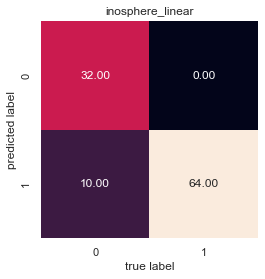

   Precision    Recall
0   1.000000  0.761905
1   0.864865  1.000000
accuracy      0.905660


In [28]:
train_datas, test_datas, train_labels, test_labels = train_test_split(datas, labels, test_size=0.3, random_state=1)


# linear
model = SVC(kernel='linear')
model.fit(train_datas, train_labels)
predicts = model.predict(test_datas)

plot_confusion_matrix(confusion_matrix(test_labels, predicts), 'inosphere_linear', [0, 1])
plt.show()

precision = metrics.precision_score(test_labels, predicts, average=None)
recall = metrics.recall_score(test_labels, predicts, average=None)
accuracy = metrics.accuracy_score(test_labels, predicts)

plot_performance(precision, recall, accuracy, [0,1])

SVC(coef0=0, degree=2, kernel='poly')


,param_degree,param_gamma,param_coef0,mean_test_score,rank_test_score
0,2,auto,0,0.702041,12
1,2,scale,0,0.893878,1
2,2,0.01,0,0.657143,13
3,3,auto,0,0.657143,13
4,3,scale,0,0.840816,5
5,3,0.01,0,0.657143,13
6,4,auto,0,0.657143,13
7,4,scale,0,0.730612,10
8,4,0.01,0,0.657143,13
9,2,auto,0.01,0.710204,11


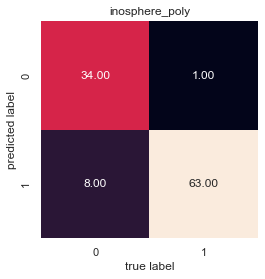

   Precision    Recall
0   0.971429  0.809524
1   0.887324  0.984375
accuracy      0.915094


In [29]:
# polynomial
model = SVC(kernel='poly')
parameter = [{'degree': [2, 3, 4], 'gamma': ['auto', 'scale', 0.01], 'coef0': [0, 1e-2, 1e-1]}]
grid_search = GridSearchCV(model, parameter, scoring='accuracy')
grid_search.fit(train_datas, train_labels)
best_model = grid_search.best_estimator_


print(best_model)
#print(grid_search.cv_results_.keys())

cv_results = {'param_degree': grid_search.cv_results_['param_degree'], 'param_gamma': grid_search.cv_results_['param_gamma'], 
                'param_coef0': grid_search.cv_results_['param_coef0'], 'mean_test_score': grid_search.cv_results_['mean_test_score'],
                'rank_test_score': grid_search.cv_results_['rank_test_score']}	
table = pd.DataFrame(cv_results)
display(table)


predicts = best_model.predict(test_datas)
plot_confusion_matrix(confusion_matrix(test_labels, predicts), 'inosphere_poly', [0, 1])
plt.show()

precision = metrics.precision_score(test_labels, predicts, average=None)
recall = metrics.recall_score(test_labels, predicts, average=None)
accuracy = metrics.accuracy_score(test_labels, predicts)

plot_performance(precision, recall, accuracy, [0,1])


SVC()


,param_gamma,mean_test_score,rank_test_score
0,auto,0.910204,4
1,scale,0.938776,1
2,0.01,0.824490,5
3,0.1,0.938776,1
4,1,0.914286,3
5,10,0.673469,6


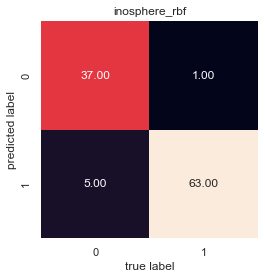

   Precision    Recall
0   0.973684  0.880952
1   0.926471  0.984375
accuracy      0.943396


In [30]:
# rbf
model = SVC(kernel='rbf')
parameter = [
    {'gamma': ['auto', 'scale', 0.01, 0.1, 1, 10]}]
grid_search = GridSearchCV(model, parameter, scoring='accuracy')
grid_search.fit(train_datas, train_labels)
best_model = grid_search.best_estimator_
print(best_model)
#print(grid_search.cv_results_)

#print(grid_search.cv_results_.keys())

cv_results = {'param_gamma': grid_search.cv_results_['param_gamma'], 
                'mean_test_score': grid_search.cv_results_['mean_test_score'],
                'rank_test_score': grid_search.cv_results_['rank_test_score']}	
table = pd.DataFrame(cv_results)
display(table)


predicts = best_model.predict(test_datas)
plot_confusion_matrix(confusion_matrix(test_labels, predicts), 'inosphere_rbf', [0, 1])
plt.show()

precision = metrics.precision_score(test_labels, predicts, average=None)
recall = metrics.recall_score(test_labels, predicts, average=None)
accuracy = metrics.accuracy_score(test_labels, predicts)

plot_performance(precision, recall, accuracy, [0,1])